## Lab 9: Starter Code

### Part A: Using Statsmodels

In [10]:
import pandas as pd
import numpy as np
# Statsmodels logistic regression is sm.Logit
import statsmodels.api as sm

In [11]:
# Read in the data collegeadmissions.csv as df
df = pd.read_csv('../../datasets/collegeadmissions.csv')

In [12]:
# show first few rows
df.head()

admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4

In [13]:
# create dummies from rank and join it to df
df = df.join(pd.get_dummies(df['rank']))

In [14]:
# show first rows again
df.head()

admit  gre   gpa  rank  1  2  3  4
0      0  380  3.61     3  0  0  1  0
1      1  660  3.67     3  0  0  1  0
2      1  800  4.00     1  1  0  0  0
3      1  640  3.19     4  0  0  0  1
4      0  520  2.93     4  0  0  0  1

In [15]:
X = df[['gre', 'gpa', 1, 2, 3,]]

In [16]:
X
y = df['admit']

lm = sm.Logit(y, X)
result = lm.fit()

result.summary()
print df.admit.mean()
print np.exp(result.params)

Optimization terminated successfully.
         Current function value: 0.606023
         Iterations 5
0.3175
gre    1.001091
gpa    0.596478
1      3.608749
2      1.642730
3      0.940685
dtype: float64


In [8]:
X = sm.add_constant(X)
X

const  gre   gpa  1  2  3
0      1.0  380  3.61  0  0  1
1      1.0  660  3.67  0  0  1
2      1.0  800  4.00  1  0  0
3      1.0  640  3.19  0  0  0
4      1.0  520  2.93  0  0  0
5      1.0  760  3.00  0  1  0
6      1.0  560  2.98  1  0  0
7      1.0  400  3.08  0  1  0
8      1.0  540  3.39  0  0  1
9      1.0  700  3.92  0  1  0
10     1.0  800  4.00  0  0  0
11     1.0  440  3.22  1  0  0
12     1.0  760  4.00  1  0  0
13     1.0  700  3.08  0  1  0
14     1.0  700  4.00  1  0  0
15     1.0  480  3.44  0  0  1
16     1.0  780  3.87  0  0  0
17     1.0  360  2.56  0  0  1
18     1.0  800  3.75  0  1  0
19     1.0  540  3.81  1  0  0
20     1.0  500  3.17  0  0  1
21     1.0  660  3.63  0  1  0
22     1.0  600  2.82  0  0  0
23     1.0  680  3.19  0  0  0
24     1.0  760  3.35  0  1  0
25     1.0  800  3.66  1  0  0
26     1.0  620  3.61  1  0  0
27     1.0  520  3.74  0  0  0
28     1.0  780  3.22  0  1  0
29     1.0  520  3.29  1  0  0
..     ...  ...   ... .. .. ..
370    1.0  540  3.77  0  1  0
371    1.0  680  3.76  0  0  1
372    1.0  680  2.42  1  0  0
373    1.0  620  3.37  1  0  0
374    1.0  560  3.78  0  1  0
375    1.0  560  3.49  0  0  0
376    1.0  620  3.63  0  1  0
377    1.0  800  4.00  0  1  0
378    1.0  640  3.12  0  0  1
379    1.0  540  2.70  0  1  0
380    1.0  700  3.65  0  1  0
381    1.0  540  3.49  0  1  0
382    1.0  540  3.51  0  1  0
383    1.0  660  4.00  1  0  0
384    1.0  480  2.62  0  1  0
385    1.0  420  3.02  1  0  0
386    1.0  740  3.86  0  1  0
387    1.0  580  3.36  0  1  0
388    1.0  640  3.17  0  1  0
389    1.0  640  3.51  0  1  0
390    1.0  800  3.05  0  1  0
391    1.0  660  3.88  0  1  0
392    1.0  600  3.38  0  0  1
393    1.0  620  3.75  0  1  0
394    1.0  460  3.99  0  0  1
395    1.0  620  4.00  0  1  0
396    1.0  560  3.04  0  0  1
397    1.0  460  2.63  0  1  0
398    1.0  700  3.65  0  1  0
399    1.0  600  3.89  0  0  1

[400 rows x 6 columns]

In [9]:
y = df['admit']

lm = sm.Logit(y, X)
result = lm.fit()

result.summary()
print df.admit.mean()

0.3175


In [10]:
# You can easily convert these into odds using numpy.exp()
print np.exp(result.params)

const    0.003921
gre      1.002267
gpa      2.234545
1        4.718371
2        2.401325
3        1.235233
dtype: float64


The above makes it more clear that a schools rank as it approaches 4 decreases the odds of getting admitted.
The accuracy of the model with all features (removing one rank) is ~70%.

In [11]:
predicted = result.predict(X)
threshold = 0.5
predicted_classes = (predicted > threshold).astype(int)
from sklearn.metrics import accuracy_score
accuracy_score(y, predicted_classes)

0.70999999999999996

### Part B: ROC/AUC

Below is some code to walk through confusion matrices. It'll be useful for working through the Titanic problem.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

Below the ROC curve is based on various thresholds: it shows with a false positive rate (x-axis) ~0, it also expects a true positive rate (y-axis) ~0 (the same, ish, for the top right hand of the figure).

The second chart, which does not play with thesholds, shows the one true TPR and FPR point, joined to 0,0 and 1,1.

The first chart will be more effective as you compare models and determine where the decision line should exist for the data. The second simplifies the first in case this idea of thresholds is confusing.

In [13]:
# first is real value, second is the true value
fpr = roc_curve(df[['admit']], predicted)[0]
tpr = roc_curve(df[['admit']], predicted)[1]

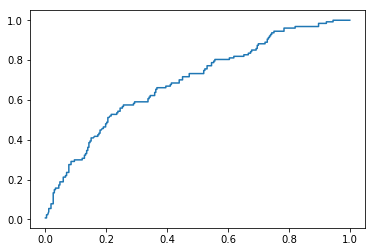

In [16]:
plt.plot(fpr, tpr)

Finally, you can use the `roc_auc_score` function to calculate the area under these curves (AUC).

In [17]:
roc_auc_score(df['admit'], predicted_classes)

0.58331170142193767

### Part C: Using SKLEARN

#### Note: sklearn also has logistic regression:
```
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X, y)
```

### Titanic Problem

In [51]:
# import survival.csv as titanic
titanic = pd.read_csv('../../datasets/survival.csv')

In [52]:
# show first few rows
titanic.head()

PassengerId  is_male  Location  Class     Fare   Age  had_parents  \
0            1        1         0      0   7.2500  22.0            0   
1            2        0         1      0  71.2833  38.0            0   
2            3        0         0      0   7.9250  26.0            0   
3            4        0         1      0  53.1000  35.0            0   
4            5        1         0      0   8.0500  35.0            0   

   had_siblings  Survived  
0             1         0  
1             1         1  
2             0         1  
3             1         1  
4             0         0

In [53]:
# set 'PassengerId' as the index with inplace=True
titanic.set_index('PassengerId', inplace=True)

In [54]:
titanic.head()

is_male  Location  Class     Fare   Age  had_parents  \
PassengerId                                                         
1                  1         0      0   7.2500  22.0            0   
2                  0         1      0  71.2833  38.0            0   
3                  0         0      0   7.9250  26.0            0   
4                  0         1      0  53.1000  35.0            0   
5                  1         0      0   8.0500  35.0            0   

             had_siblings  Survived  
PassengerId                          
1                       1         0  
2                       1         1  
3                       0         1  
4                       1         1  
5                       0         0

In [55]:
import seaborn as sns

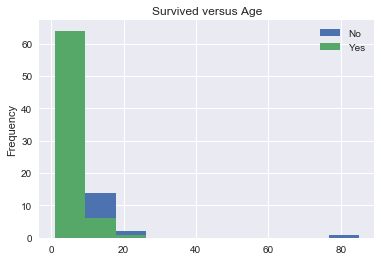

In [56]:
# Show histogram of age split by "survived" and "not survived"
%matplotlib inline
by_age = titanic.groupby(['Age', 'Survived']).size().unstack('Survived')
by_age.columns = ['No', 'Yes']
by_age.plot.hist(title='Survived versus Age')

In [57]:
# show last few rows of data
titanic.tail()

is_male  Location  Class   Fare    Age  had_parents  \
PassengerId                                                        
887                1         0      1  13.00  27.00            0   
888                0         1      0  30.00  19.00            0   
889                0         0      0  23.45  21.75            1   
890                1         1      0  30.00  26.00            0   
891                1         0      0   7.75  32.00            0   

             had_siblings  Survived  
PassengerId                          
887                     0         0  
888                     0         1  
889                     1         0  
890                     0         1  
891                     0         0

In [58]:
# summary of data
titanic.describe()

is_male    Location       Class        Fare         Age  \
count  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.647587    0.242424    0.206510   32.204208   29.318643   
std      0.477990    0.428790    0.405028   49.693429   13.281103   
min      0.000000    0.000000    0.000000    0.000000    0.420000   
25%      0.000000    0.000000    0.000000    7.910400   21.750000   
50%      1.000000    0.000000    0.000000   14.454200   26.507589   
75%      1.000000    0.000000    0.000000   31.000000   36.000000   
max      1.000000    1.000000    1.000000  512.329200   80.000000   

       had_parents  had_siblings    Survived  
count   891.000000    891.000000  891.000000  
mean      0.239057      0.317621    0.383838  
std       0.426747      0.465813    0.486592  
min       0.000000      0.000000    0.000000  
25%       0.000000      0.000000    0.000000  
50%       0.000000      0.000000    0.000000  
75%       0.000000      1.000000    1.000000  
max       1.000000      1.000000    1.000000

In [64]:
from sklearn import grid_search, cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn import metrics 

# select your columns for inputs and create X_train, X_test, y_train, y_test
feature_set = titanic[['is_male', "Location", "Class", 'Fare', 'Age', 'had_parents', 'had_siblings']]
X_train, X_test, y_train, y_test = train_test_split(feature_set, titanic.Survived, test_size= 0.2)
# Create grid_search.GridSearchCV and tune "C" and "class_weight"
# "C": Inverse of regularization strength; must be a positive float. 
# Smaller C values specify stronger regularization.

# "class_weight" gives automatically more weight to "rare" class data.
# Use these values: 'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'balanced']
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'balanced']},
    cv=cross_validation.KFold(n=len(X_train), n_folds=10),
    scoring='roc_auc'
)

gs.fit(X_train, y_train)
gs.grid_scores_
#print gs.best_estimator_

[mean: 0.82445, std: 0.05551, params: {'C': 100000, 'class_weight': None},
 mean: 0.82361, std: 0.05518, params: {'C': 100000, 'class_weight': 'balanced'},
 mean: 0.82445, std: 0.05551, params: {'C': 10000, 'class_weight': None},
 mean: 0.82361, std: 0.05518, params: {'C': 10000, 'class_weight': 'balanced'},
 mean: 0.82445, std: 0.05551, params: {'C': 1000, 'class_weight': None},
 mean: 0.82369, std: 0.05523, params: {'C': 1000, 'class_weight': 'balanced'},
 mean: 0.82453, std: 0.05570, params: {'C': 100, 'class_weight': None},
 mean: 0.82370, std: 0.05512, params: {'C': 100, 'class_weight': 'balanced'},
 mean: 0.82451, std: 0.05572, params: {'C': 10, 'class_weight': None},
 mean: 0.82411, std: 0.05498, params: {'C': 10, 'class_weight': 'balanced'},
 mean: 0.82438, std: 0.05587, params: {'C': 1, 'class_weight': None},
 mean: 0.82502, std: 0.05458, params: {'C': 1, 'class_weight': 'balanced'},
 mean: 0.82447, std: 0.05812, params: {'C': 0.1, 'class_weight': None},
 mean: 0.82136, std: 0

In [65]:
print gs.best_estimator_

LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [66]:
y_pred = gs.best_estimator_.predict(X_test)

In [67]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[89, 22],
       [11, 57]])

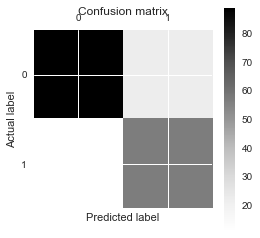

In [68]:
# Show confusion matrix in a separate window
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

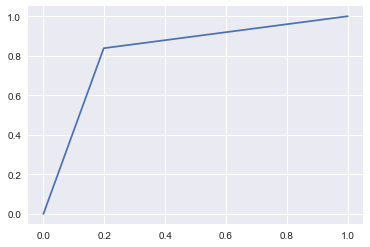

In [72]:
y_pro = gs.best_estimator_.predict_proba(X_test)
fpr1 = roc_curve(y_test, y_pred)[0]
tpr1 = roc_curve(y_test, y_pred)[1]
plt.plot(fpr1, tpr1)

In [70]:
roc_auc_score(y_test, y_pred)

0.82001854795972451

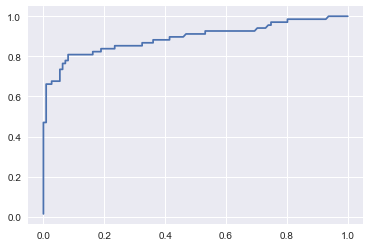

In [74]:
y_pro = gs.best_estimator_.predict_proba(X_test)
fpr = roc_curve(y_test, y_pro[:,1])[0]
tpr = roc_curve(y_test, y_pro[:,1])[1]
plt.plot(fpr, tpr)

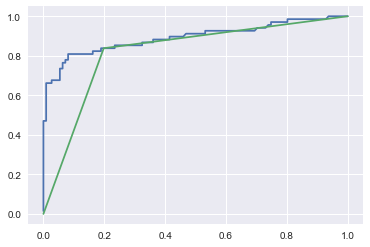

In [75]:
y_pro = gs.best_estimator_.predict_proba(X_test)
fpr = roc_curve(y_test, y_pro[:,1])[0]
tpr = roc_curve(y_test, y_pro[:,1])[1]
plt.plot(fpr, tpr)
plt.plot(fpr1, tpr1)

In [ ]:
# first graph is discrete (0, 1)
# second graph is continuous (percentage)
